In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn import cross_validation, tree, metrics
from sklearn.cross_validation import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.25, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Градиентный бустинг - это метод построения композиций базовых алгоритмов с помощью последовательного добавления к текущей композиции нового алгоритма с некоторым коэффициентом. Градиентный бустинг обучает каждый новый алгоритм так, чтобы он приближал антиградиент ошибки по ответам композиции на обучающей выборке. Реализуем вначале метод своими руками

In [ ]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(basics, ws)]) for x in X]

basics = []
ws = []
y_cur = np.array(y_train)
for i in range(50):
    regr = tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    basics.append(regr)
    ws.append(0.9/(1.0+i%10))
    y_cur = y_train - gbm_predict(X_train)
    
np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))   

 

Исследуем, переобучается ли градиентный бустинг с ростом числа итераций, а также с ростом глубины деревьев. 

In [ ]:
from sklearn.ensemble import GradientBoosting
%pylab inline

[6.4025278864481461, 5.0106760636909833, 4.4352413356581053]
[6.2831554949797539, 4.923716334949118, 4.3293478973462918]
[6.529323537856671, 5.0966279747592038, 4.4736425167369189]
[6.6465063640126338, 5.2772101413262735, 4.6066553644760129]
[6.6441007046316498, 5.6684735423686652, 5.2978257451982813]
[6.6883266816310805, 5.7069831569249212, 5.3641002877862904]
Wall time: 4.72 s


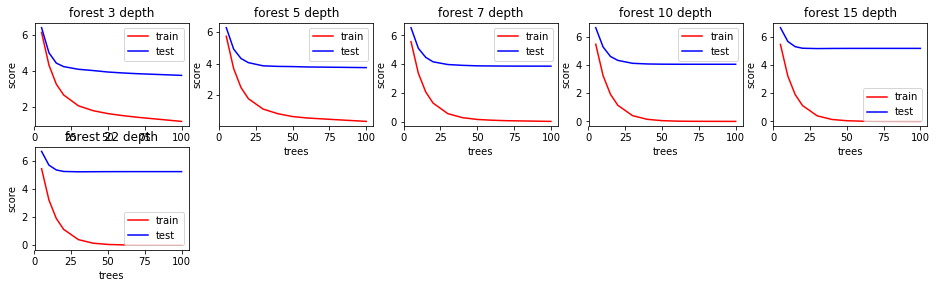

In [6]:
%%time
trees = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 100])
depths = np.array([3, 5, 7, 10, 15, 22])
pyplot.figure(figsize=(16, 11))
i = 1
for d in depths:
    scores_train = []
    scores_test = []
    for num in trees:
        boost = GradientBoostingClassifier(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(metrics.mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    ax = plt.subplot(5, 5, i)
    ax.set_title("forest {} depth".format(d))
    pyplot.plot(trees, scores_train, color="red", label="train")
    pyplot.plot(trees, scores_test, color="blue", label="test")
    pyplot.xlabel("trees")
    pyplot.ylabel("score")
    pyplot.legend()
    i += 1
    print (1, 3)

Сравним получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии. В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. 

In [8]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression().fit(X_train, y_train)
pred = lin.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))

5.458072843434544